#  Sepsis Prediction using Machine Learning

## `Business Understanding`
Sepsis is a life-threatening condition that arises when the body's response to infection causes injury to its own tissues and organs. It is a major healthcare problem, causing millions of deaths worldwide each year. Early detection and prompt treatment of sepsis are critical to improving patient outcomes and reducing mortality rates. 


`Problem statement:`
Healthcare providers need an effective tool to predict and diagnose sepsis early to provide timely intervention and improve patient outcomes. Current diagnostic methods often rely on clinical judgment and basic laboratory tests, which can be slow and sometimes inaccurate. There is a need for an advanced predictive model that can analyze large volumes of patient data and identify patterns indicative of sepsis in its early stages.

`Objectives:`
- Early Detection: Develop a machine learning model that can predict the onset of sepsis early using patient data such as vital signs, laboratory results, and demographic information.
- Accuracy: Ensure that the model has high sensitivity and specificity to minimize false positives and false negatives.
Integration: Integrate the model into hospitals' electronic health record (EHR) system for real-time monitoring and alerts.
- Outcome Improvement: Reduce the mortality rate and healthcare costs associated with sepsis by enabling timely and targeted interventions.



## `Hypothesis`
`Null Hypothesis (H₀):` The mean Body Mass Index (M11) for patients with positive Sepsis is equal to that for patients with negative Sepsis.

`Alternative Hypothesis (H₁):` The mean Body Mass Index (M11) for patients with positive Sepsis is different from that for patients with negative Sepsis.


## `Research Questions`
- What is the distribution of ages among the patients?
- What is the correlation between Plasma glucose concentration (PL) and Sepsis?
- What is the relationship between age and the number of times pregnant (PRG)?
- How does the average skin thickness (SK) differ between patients with and without insurance?


`key Attributes in dataset`
- ID: number to represent patient ID
- PRG: Plasma glucose
- PL: Blood Work Result-1 (mu U/ml)
- PR: Blood Pressure (mm Hg)
- SK: Blood Work Result-2 (mm)
- TS: Blood Work Result-3 (mu U/ml)
- M11: Body mass index (weight in kg/(height in m))^2
- BD2: Blood Work Result-4 (mu U/ml)
- Age: patients age (years)
- Insurance: If a patient holds a valid insurance card
- Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

`Methodology:`
- Data Collection: Gather historical patient data from kaggle.
- Data Preprocessing: Clean and preprocess data to handle missing values, normalize values, and create features.
- Model Development: Use machine learning algorithms such as logistic regression, random forests, or deep learning to build predictive models.
- Model Evaluation: Validate the model using metrics like accuracy, precision, recall, and the area under the receiver operating characteristic curve (AUC-ROC).
- Deployment: Integrate the model into the hospital's EHR system and set up real-time monitoring and alerting.
- Continuous Improvement: Monitor the model's performance in a real-world setting and update it as needed to maintain accuracy and effectiveness.

`Expected Benefits:`
- Improved Patient Outcomes: Early detection and treatment can significantly reduce the mortality rate associated with sepsis.
- Cost Savings: Reduced length of hospital stays and less intensive care required for early-detected cases.
- Operational Efficiency: Automated alerts and monitoring can help healthcare providers manage their workload more effectively.
- Data-Driven Insights: The model can provide insights into risk factors and trends related to sepsis, informing future healthcare practices and policies.

In [25]:
import pandas as pd
import numpy as np
import re
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway
import plotly.express as px


# Machine Learning Packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


warnings.filterwarnings('ignore')
print("Activated")

Activated


## Data Loading and Processing

In [26]:
# Load dataset
data = pd.read_csv('./data/Paitients_Files_Train.csv')

In [27]:
# Print first 5 rows of dataset
data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [28]:
# Check the number of rows and columns of the dataset
data.shape

(599, 11)

In [29]:
# Check statistical measures
data.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
# Check for null values
data.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

## Univariate Analysis

### Check for outliers

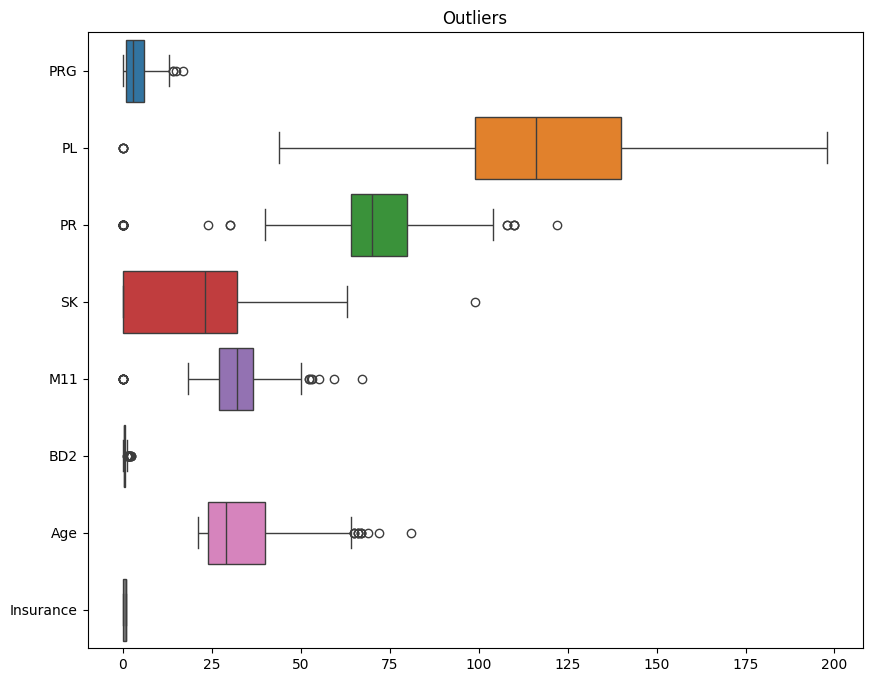

In [31]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data.drop(['ID', 'TS', 'Sepssis'], axis=1), orient='h')
plt.title('Outliers')
plt.show()

## Answer Analytical Questions

### Question 1: What is the distribution of ages among the patients?

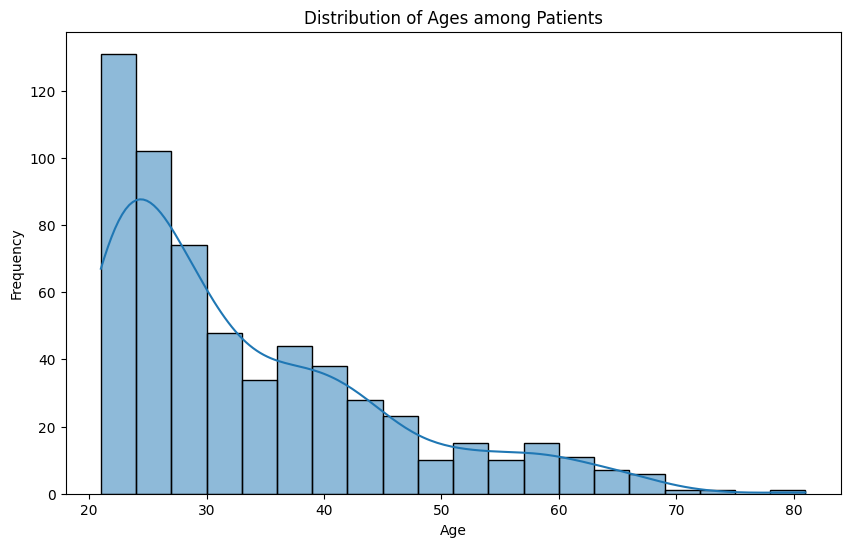

In [32]:
# Histogram plot for age distribution among the patients
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Ages among Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Question 2: Is there a correlation between Plasma glucose concentration (PL) and Sepsis?

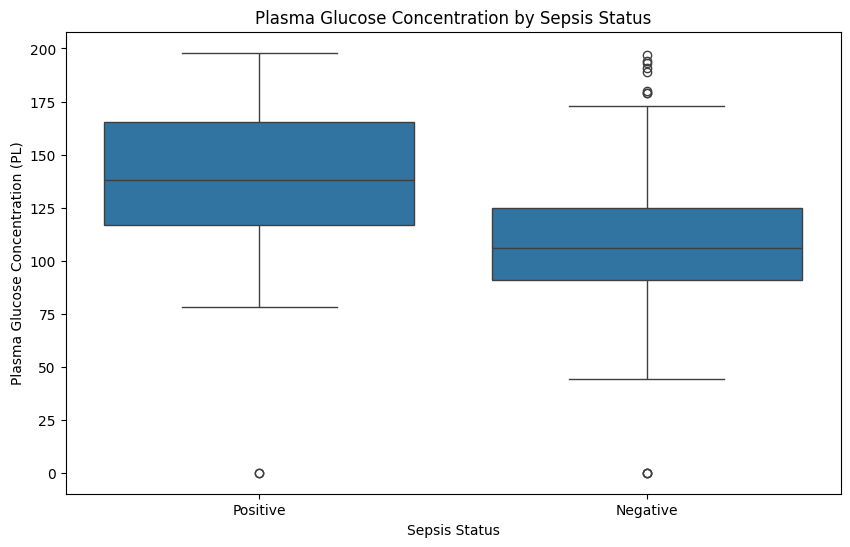

In [33]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sepssis', y='PL', data=data)
plt.title('Plasma Glucose Concentration by Sepsis Status')
plt.xlabel('Sepsis Status')
plt.ylabel('Plasma Glucose Concentration (PL)')
plt.show()

### Question 3: What is the relationship between Age and Number of times pregnant (PRG)?

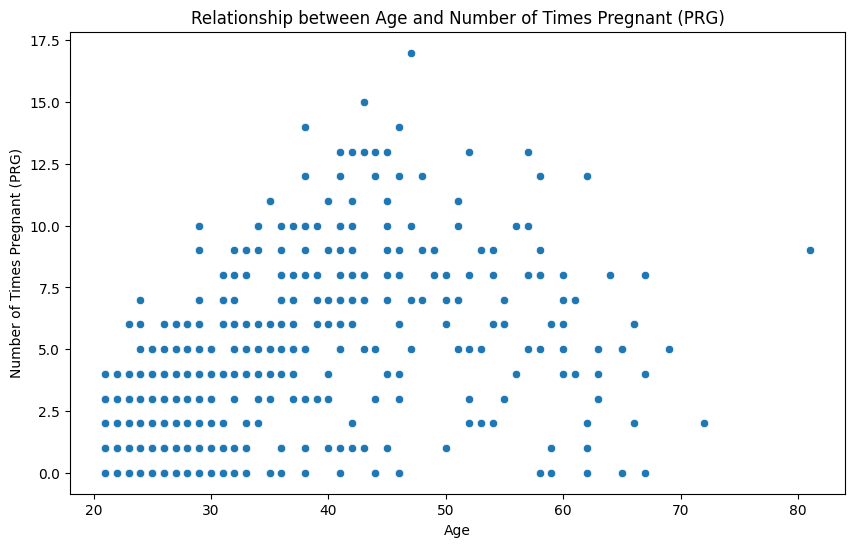

In [34]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='PRG', data=data)
plt.title('Relationship between Age and Number of Times Pregnant (PRG)')
plt.xlabel('Age')
plt.ylabel('Number of Times Pregnant (PRG)')
plt.show()

### Question 4: What is the average Skin Thickness (SK) by Insurance status?

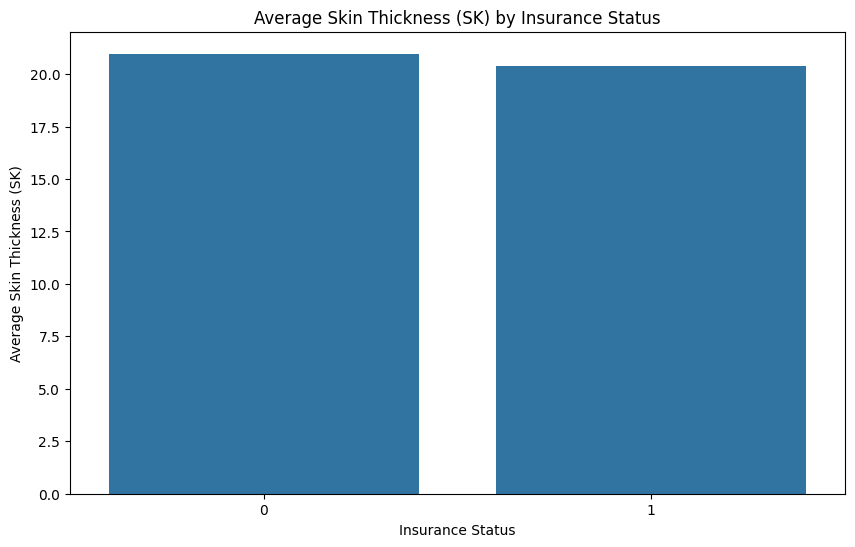

In [35]:
plt.figure(figsize=(10, 6))
insurance_avg_sk = data.groupby('Insurance')['SK'].mean().reset_index()
sns.barplot(x='Insurance', y='SK', data=insurance_avg_sk)
plt.title('Average Skin Thickness (SK) by Insurance Status')
plt.xlabel('Insurance Status')
plt.ylabel('Average Skin Thickness (SK)')
plt.show()

## Hypothesis Testing

T-statistic: nan, P-value: nan


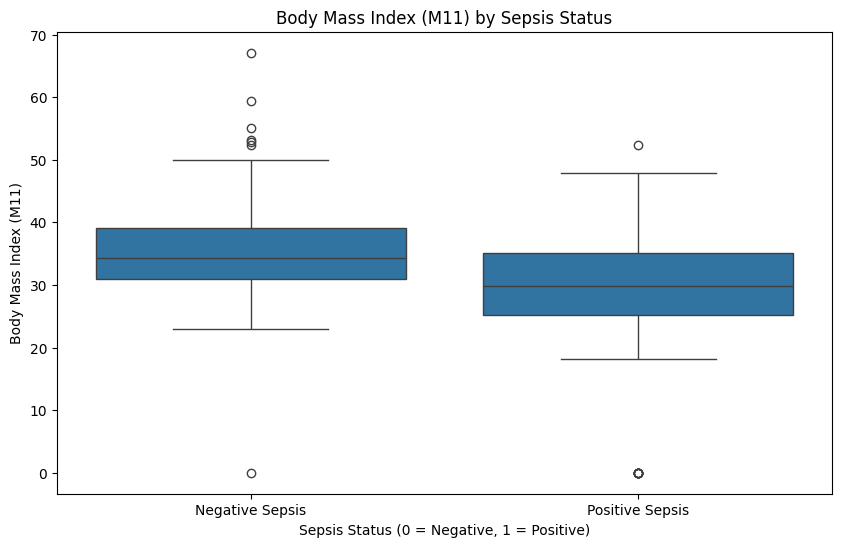

Fail to reject the null hypothesis. There is no significant difference in Body Mass Index (M11) between patients with positive and negative Sepsis.


In [36]:
# Extract the Body Mass Index (M11) for positive and negative Sepsis groups
positive_sepsis = data[data['Sepssis'] == 1]['M11']
negative_sepsis = data[data['Sepssis'] == 0]['M11']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(positive_sepsis.dropna(), negative_sepsis.dropna())
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Visualize the results
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sepssis', y='M11', data=data)
plt.title('Body Mass Index (M11) by Sepsis Status')
plt.xlabel('Sepsis Status (0 = Negative, 1 = Positive)')
plt.ylabel('Body Mass Index (M11)')
plt.xticks([0, 1], ['Negative Sepsis', 'Positive Sepsis'])
plt.show()

# Display statistical results on the plot
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in Body Mass Index (M11) between patients with positive and negative Sepsis.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in Body Mass Index (M11) between patients with positive and negative Sepsis.")


## `Data Preparation`

In [37]:
data['Sepssis'].value_counts()

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

In [38]:
X = data.drop(columns=['ID','Sepssis'])
y = data['Sepssis']

In [39]:
X

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0
595,0,188,82,14,185,32.0,0.682,22,1
596,0,67,76,0,0,45.3,0.194,46,1
597,1,89,24,19,25,27.8,0.559,21,0


In [40]:
y

0      Positive
1      Negative
2      Positive
3      Negative
4      Positive
         ...   
594    Negative
595    Positive
596    Negative
597    Negative
598    Positive
Name: Sepssis, Length: 599, dtype: object

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [42]:
# Initialize a LabelEncoder to encode the target variable
label_encoder = LabelEncoder()
y_train_encoder = label_encoder.fit_transform(y_train)
y_test_encoder = label_encoder.transform(y_test)

In [43]:
input_variables = X.columns
input_variables

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='median'), input_variables),
        ('scaler', RobustScaler(), input_variables),
        ('log_transformations', FunctionTransformer(np.log1p), input_variables)
    ]
)

## `Modeling`

In [45]:
models = [
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic_Regression', LogisticRegression(random_state=42, max_iter=1000)),
    ('KNC', KNeighborsClassifier(n_neighbors=5)),
    ('Random_Forest', RandomForestClassifier(random_state=42))
]

### Train on Unbalanced dataset

In [46]:
metrics = []

# Iterate over each tuple to train the model, make predictions on the test set, and compute evaluation metrics
for model_name, model in models:
    pipeline = Pipeline(
        steps=[
            ('preprocesor',preprocessor),
            ('model',model)
        ]
    )
    
    pipeline.fit(X_train, y_train_encoder)
    y_pred = pipeline.predict(X_test)

    # Metrics such as accuracy, F1 score, ROC AUC score, precision, and recall are calculated for each model
    acc = accuracy_score(y_test_encoder, y_pred)
    f1 = f1_score(y_test_encoder, y_pred)
    roc = roc_auc_score(y_test_encoder, y_pred)
    pr = precision_score(y_test_encoder, y_pred)
    rc = recall_score(y_test_encoder, y_pred)

    metrics.append({'Model': model.__class__.__name__,
                    'Accuracy Score': acc,
                    'F1 Score': f1,
                    'ROC AUC Score': roc,
                    'Precision Score': pr,
                    'Recall Score': rc})

# Create a pandas DataFrame from the metrics and sort it based on the F1 score in descending order
overall = pd.DataFrame(metrics)
overall = overall.sort_values(by='F1 Score', ascending=False)
overall_styled = overall.style.background_gradient(cmap='winter')
overall_styled

,Model,Accuracy Score,F1 Score,ROC AUC Score,Precision Score,Recall Score
1,LogisticRegression,0.760000,0.632653,0.721546,0.673913,0.596154
3,RandomForestClassifier,0.740000,0.589474,0.692700,0.651163,0.538462
2,KNeighborsClassifier,0.693333,0.540000,0.652473,0.562500,0.519231
0,DecisionTreeClassifier,0.686667,0.483516,0.624804,0.564103,0.423077


### Train On Balanced Dataset

In [47]:
# Initialize a dictionary to store all pipelines
all_balanced_pipelines = {}

# Define a table to hold all the metrics
balanced_metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'conf_matrix'])

# Loop through the models
for model_name, model in models:
    # Build final pipeline with preprocessor estimator
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote-sampler', SMOTE(random_state=42)),
        ('estimator', model)
    ])

    # Fit training data to final pipeline
    balanced_pipeline.fit(X_train, y_train_encoder)

    # Add models to all_pipeline dictionary
    all_balanced_pipelines[model_name] = balanced_pipeline

    # Make prediction
    y_predict = balanced_pipeline.predict(X_test)

    # Generate Classification report for each pipeline or model
    balanced_metrics = classification_report(y_test_encoder, y_predict, output_dict=True)
        
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test_encoder, y_predict)

    # Grab all important metrics
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1_score = balanced_metrics['weighted avg']['f1-score']

    # Add important metrics to metrics_table
    balanced_metrics_table.loc[len(balanced_metrics_table)] = [model_name, accuracy, precision, recall, f1_score, conf_matrix]

# Display metrics_table
balanced_metrics_table = balanced_metrics_table.sort_values(by="accuracy", ascending=False)
balanced_metrics_table_styled = balanced_metrics_table.style.background_gradient(cmap='winter')
balanced_metrics_table_styled

,model_name,accuracy,precision,recall,f1_score,conf_matrix
1,Logistic_Regression,0.753333,0.770312,0.753333,0.757797,[[74 24] [13 39]]
3,Random_Forest,0.746667,0.751844,0.746667,0.748719,[[77 21] [17 35]]
0,Decision_Tree,0.680000,0.689490,0.680000,0.683675,[[71 27] [21 31]]
2,KNC,0.640000,0.679459,0.640000,0.648578,[[61 37] [17 35]]


In [49]:
# Define the models
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
knc = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)


# Define parameter grid for the three models
params_grid = {
    'rfc': {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__bootstrap': [True, False]
    },
    'knc': {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
}


# Initialize dictionary to store best params and best model
best_models = {}
best_params = {}



# Perform grid search for each model
for model_name, params in params_grid.items():
    if model_name == "rfc":
        model = rfc
    else:
        model = knc
        
    balanced_pipeline = ImbPipeline(steps=[
    ('preprocessor',preprocessor),
    ('smote-sampler',SMOTE(random_state=42)),
    ('model', model )
    ])   
    grid_cv = GridSearchCV(estimator=balanced_pipeline,param_grid=params, scoring='f1', n_jobs=-1, verbose=2)

    grid_cv.fit(X_train, y_train)

    # Get best params and best model
    best_params[model_name] = grid_cv.best_params_
    best_models[model_name] = grid_cv.best_estimator_

# Print best parameters for each model
for model_name, params in best_params.items():
    print(f"The best parameters for {model_name}: {params}")

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.